## Title
Recreating image of Pavlos

## Description :
The aim of this exercise is to understand image reconstruction using autoencoders.

<img src="../fig/fig2.png" style="width: 500px;">

## Instructions:
- Load the 3 images given.
- Use the helper code to reshape and flatten the images.
- Create an autoencoder by defining the encode and decode layers.
- Fit on the image of Pavlos.
- Visualise the train and validation loss. This will look similar to the image given above.
- Go through the reconstruction part carefully and understand what is happening in each step. There is no code you will have to fill in this part. 

## Reconstruction Description:

The reconstruction part of this exercise tries to recreate the input image given. It is important to remember that our model has learnt from only one image i.e. the one of Pavlos. In the first section of this part, we give Pavlos's image as the input and the model recreates and outputs the correct image with very little noise. This looks similar to the image given below.

<img src="../fig/fig3.png" style="width: 500px;">

We then give the image of an eagle as the input, however, the output is still Pavlos! The noise is represented in the 3 part of the image given below.

<img src="../fig/fig4.png" style="width: 500px;">

Finally, we try to get a different output image by giving the input image of a human. Pavlos triumphs again.

<img src="../fig/fig5.png" style="width: 500px;">


## Hints: 

<a href="https://keras.io/guides/sequential_model/" target="_blank">keras.compile()</a> Compiles the layers into a network.

<a href="https://keras.io/guides/sequential_model/" target="_blank">keras.Sequential()</a> Models a sequential neural network.

<a href="https://keras.io/api/layers/core_layers/dense/" target="_blank">keras.Dense()</a> A regular densely-connected NN layer.

In [1]:
# Import the libraries
import tensorflow as tf
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
%matplotlib inline
from tensorflow.keras.models import Sequential, Model

import tensorflow.keras as keras
from tensorflow.keras import layers, Model, Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

from PIL import Image
import scipy.ndimage as ndi


2023-09-04 14:53:58.323198: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-09-04 14:53:58.463495: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-09-04 14:53:58.464488: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-09-04 14:53:59.405397: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
# Loading the 3 images
pavlos_img_ptr = np.array(Image.open("../data/pavlos.png"))[:,:,0:1]
# if [:,:,0] will get shape (302,299)
notpavlos_img_ptr = np.array(Image.open("../data/not-pavlos.png"))[:,:,0:1]
notpavlos2_img_ptr = np.array(Image.open("../data/not-pavlos2.png"))[:,:,0:1]

In [3]:
print(pavlos_img_ptr.shape)
print(notpavlos_img_ptr.shape)
print(notpavlos2_img_ptr.shape)

(302, 299, 1)
(302, 299, 1)
(302, 299, 1)


In [4]:
# Helper function to re-size the images
def img_resize(imgs_in, factor1, factor2):
    imgs_out_train = ndi.zoom(imgs_in, (factor1, factor2, 1), order=2)
    # (1, factor, factor, 1): zoom factor that you are applying along different dimensions of the input array.
    # order=2 indicates bicubic interpolation.
    return imgs_out_train

In [5]:
# Use the helper code to reduce image size to 100x100

SIZE=100
# pavlos_img_ptr = pavlos_img_ptr[:,:,2].reshape(1,150,150,1)
pavlos_img_ptr = img_resize(pavlos_img_ptr, SIZE/pavlos_img_ptr.shape[0], SIZE/pavlos_img_ptr.shape[1])
pavlos_img_nice = pavlos_img_ptr

 
# notpavlos_img_ptr = notpavlos_img_ptr[:,:,2].reshape(1,132,132,1)
notpavlos_img_ptr = img_resize(notpavlos_img_ptr,SIZE/notpavlos_img_ptr.shape[0], SIZE/notpavlos_img_ptr.shape[1])
notpavlos_img_nice = notpavlos_img_ptr

 
# notpavlos2_img_ptr = notpavlos2_img_ptr[:,:,2].reshape(1,100,100,1)
notpavlos2_img_ptr = img_resize(notpavlos2_img_ptr, SIZE/notpavlos2_img_ptr.shape[0], SIZE/notpavlos2_img_ptr.shape[1])
notpavlos2_img_nice  = notpavlos2_img_ptr


# Flatten the images
pavlos_flatten = pavlos_img_nice.reshape(100*100,1)
print(pavlos_flatten.shape)

notpavlos_flatten = notpavlos_img_nice.reshape(100*100,1)
print(notpavlos_flatten.shape)

notpavlos2_flatten = notpavlos2_img_nice.reshape(100*100,1)
print(notpavlos2_flatten.shape)

(10000, 1)
(10000, 1)
(10000, 1)


### Create model and train

In [7]:
### edTest(test_check) ###

# Create an Autoencoder and fit it with our data using 
# 8 neurons in the dense layer using keras' functional API

# Get the input size from the shape of the flattened image
input_dim = pavlos_flatten.shape[0]
encoding_dim = 8 

# Create an input "layer" using input_dim as a parameter
input_section = Input(shape = (input_dim, ))

# Create a denser layer as the encode layer with 8 neurons and linear activation
encoded = Dense(units = 8, activation = "linear")(input_section)

# Create an autoencoder model which has input as input_section and outputs encoded
encoder = Model(input_section, encoded)


# Decoder

# Create an input "layer" using encoding_dim as shape
latent_input = Input(shape = (encoding_dim,))

# Create a denser layer as the encode layer with input_dim and linear activation
decoded = Dense(units = input_dim, activation = "linear")(latent_input)

# Create a model which has input as latent_input and outputs decoded
decoder = Model(latent_input, decoded)


2023-09-04 15:03:12.520775: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:268] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


In [9]:
### edTest(test_architecture) ###
# Create an autoencoder using keras Sequential
autoencoder = Sequential(name = "AE")

# Add the encoder followed by the decoder initialised above to the autoencoder model
autoencoder.add(encoder)
# !!!!!!!!!!!
autoencoder.add(decoder)

# Compile the model with mse as the loss and Adam optimizer with parameter 0.001
autoencoder.compile(loss = "mse", optimizer = Adam(learning_rate=0.001), metrics = ["accuracy"])

# Take a look at the summary of the model
autoencoder.summary()

Model: "AE"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 model (Functional)          (None, 8)                 80008     
                                                                 
 model_1 (Functional)        (None, 10000)             90000     
                                                                 
Total params: 170008 (664.09 KB)
Trainable params: 170008 (664.09 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [10]:
# Get the history of the model by fitting on pavlos_flatten after reshape
# Specify 100 epochs and batch size of 1000 with verbose=1
# keras expects a shape of (1,n) in the case of a flattened input.
# !!!!!!!!
history = autoencoder.fit(x = pavlos_flatten.reshape(-1, input_dim), y = pavlos_flatten.reshape(-1, input_dim), epochs=100, batch_size=1000, verbose=1)

Epoch 1/100
1/1 [==============================] - 0s 312ms/step - loss: 28490.1699 - accuracy: 0.0000e+00
Epoch 2/100
1/1 [==============================] - 0s 3ms/step - loss: 32863.3867 - accuracy: 0.0000e+00
Epoch 3/100
1/1 [==============================] - 0s 3ms/step - loss: 28374.4062 - accuracy: 0.0000e+00
Epoch 4/100
1/1 [==============================] - 0s 4ms/step - loss: 28403.5527 - accuracy: 0.0000e+00
Epoch 5/100
1/1 [==============================] - 0s 3ms/step - loss: 29103.3086 - accuracy: 0.0000e+00
Epoch 6/100
1/1 [==============================] - 0s 4ms/step - loss: 27535.2832 - accuracy: 0.0000e+00
Epoch 7/100
1/1 [==============================] - 0s 5ms/step - loss: 25253.2656 - accuracy: 0.0000e+00
Epoch 8/100
1/1 [==============================] - 0s 3ms/step - loss: 23525.1406 - accuracy: 0.0000e+00
Epoch 9/100
1/1 [==============================] - 0s 4ms/step - loss: 22283.0684 - accuracy: 0.0000e+00
Epoch 10/100
1/1 [==============================] - 0

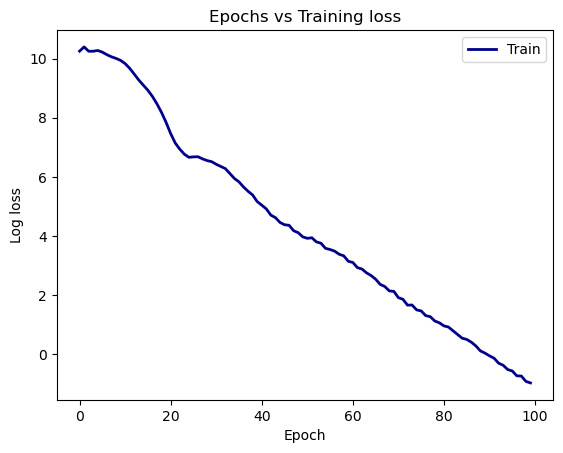

In [11]:
# Use the helper function to plot the loss

plt.plot(np.log(history.history['loss']),linewidth=2,color='darkblue' )
plt.title('Epochs vs Training loss')
plt.ylabel('Log loss')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='best')
plt.show()

### Reconstruct Pavlos

In [12]:
### Reconstruct Pavlos
pavlos_flatten_reconstructed = autoencoder(pavlos_flatten.reshape(-1,input_dim)).numpy()
pavlos_reconstructed = pavlos_flatten_reconstructed.reshape(100,100)

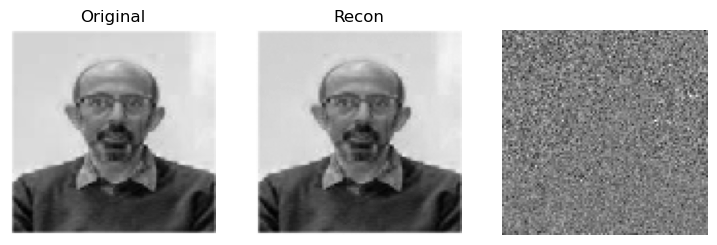

In [13]:
# Helper code to display the images
fig, ax = plt.subplots(1,3, figsize=(9,4))

ax[0].imshow(pavlos_img_nice.reshape(100,100), cmap='gray')
ax[0].set_title('Original')
ax[0].axis('off')

ax[1].imshow(pavlos_reconstructed, cmap='gray')
ax[1].set_title('Recon')
ax[1].axis('off')

ax[2].imshow(pavlos_img_nice.reshape(100,100) - pavlos_reconstructed, cmap='gray');
ax[2].axis('off');

### Reconstruct Eagle

In [14]:
### Reconstruct eagle
notpavlos_flatten_reconstructed = autoencoder(notpavlos_flatten.reshape(-1,10000)).numpy()
notpavlos_reconstructed = notpavlos_flatten_reconstructed.reshape(100,100)

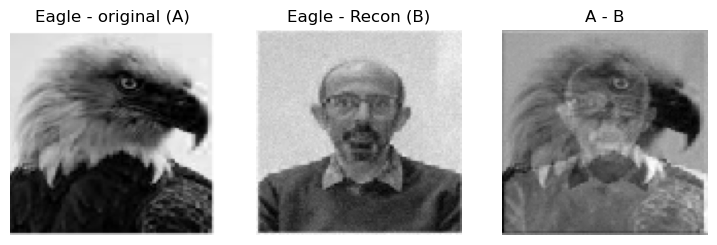

In [15]:
# Helper code to display the images
fig, ax = plt.subplots(1,3, figsize=(9,4))

ax[0].imshow(notpavlos_img_nice.reshape(100,100),cmap='gray')
ax[0].set_title('Eagle - original (A)')
ax[0].axis('off')

ax[1].imshow(notpavlos_reconstructed,cmap='gray')
ax[1].set_title('Eagle - Recon (B)')
ax[1].axis('off')

ax[2].imshow(notpavlos_img_nice.reshape(100,100) - notpavlos_reconstructed,cmap='gray')
ax[2].set_title('A - B')
ax[2].axis('off');


### Reconstruct Not Pavlos

In [27]:
### Reconstruct an image that is not of Pavlos
notpavlos2_flatten_reconstructed = autoencoder(notpavlos2_flatten.reshape(-1,input_dim)).numpy()
# from chatgpt: autoencoder(...) attempts to pass this reshaped data through the "autoencoder" model. 
# In Keras, this is not the correct way to pass data through a model. You should use autoencoder.predict(...) to get the model's predictions on input data.
notpavlos2_reconstructed = notpavlos2_flatten_reconstructed.reshape(100,100)

In [24]:
autoencoder(notpavlos2_flatten.reshape(-1,input_dim))

<tf.Tensor: shape=(1, 10000), dtype=float32, numpy=
array([[207.93637, 212.03622, 206.19598, ..., 212.47575, 205.10872,
        211.54964]], dtype=float32)>

In [23]:
autoencoder.predict(notpavlos2_flatten.reshape(-1,input_dim))

1/1 [==============================] - 0s 11ms/step


array([[207.93637, 212.03622, 206.19598, ..., 212.47575, 205.10872,
        211.54964]], dtype=float32)

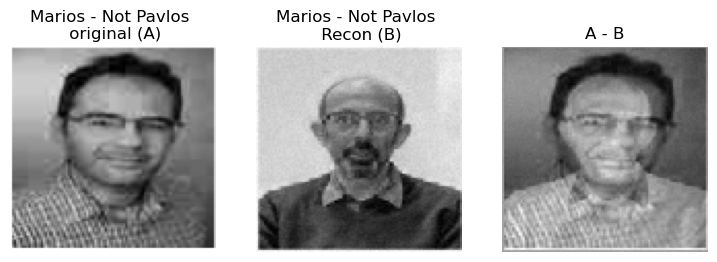

In [28]:
# Helper code to display the images
fig, ax = plt.subplots(1,3, figsize=(9,4))

ax[0].imshow(notpavlos2_img_nice.reshape(100,100),cmap='gray')
ax[0].set_title('Marios - Not Pavlos \n original (A)')
ax[0].axis('off')

ax[1].imshow(notpavlos2_reconstructed,cmap='gray')
ax[1].set_title('Marios - Not Pavlos \n Recon (B)')
ax[1].axis('off')

ax[2].imshow(notpavlos2_img_nice.reshape(100,100) - notpavlos_reconstructed,cmap='gray')
ax[2].set_title('A - B')
ax[2].axis('off');

## Mindchow 🍲 

Go back and decrease the number of epochs to see when the reconstruction starts getting grainy.

*Your answer here*